In [95]:
# installing dependencies

import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [96]:
cifar = tf.keras.datasets.cifar10

In [97]:
# loading cifar10 dataset

(X_train, y_train), (X_test, y_test) = cifar.load_data()

In [98]:
# dividing values of X_train data by 255

X_train = (np.expand_dims(X_train, axis=-1)/255.).astype(np.float32)
y_train = (y_train).astype(np.int64)

In [99]:
# dividing all values if X_train data by 255
X_test = (np.expand_dims(X_test, axis=-1)/255.).astype(np.float32)
y_test = (y_test).astype(np.int64)

In [100]:
# print shape of X_train

print(X_train.shape)

(50000, 32, 32, 3, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


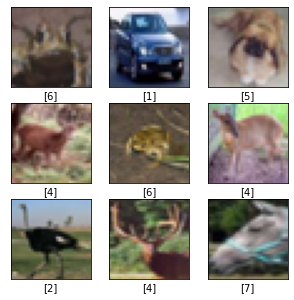

In [101]:
# plot of random 9 images from the training dataset

plt.figure(figsize=(5,5))
random_inds = np.random.choice(50000,9)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(X_train[image_ind]))
    plt.xlabel(y_train[image_ind])

In [102]:
# building fully connected model

def fully_connected_model():
  fc_model = tf.keras.Sequential([
      
      # flatting the first layer
      tf.keras.layers.Flatten(),

      # using relu activation function on first layer
      tf.keras.layers.Dense(300, activation=tf.nn.relu),

      #the second dense layer to for the 10 probabilities
      tf.keras.layers.Dense(10, activation=tf.nn.softmax),
  ])
  return fc_model

model = fully_connected_model()

In [103]:
# using stochastic gradient descent as an optimizer with learning rate 0.1

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [104]:
# training model with fix number of epochs

BATCH_SIZE = 64
EPOCHS = 5

model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
782/782 [==============================] - 8s 10ms/step - loss: 1.9689 - accuracy: 0.2908
Epoch 2/5
782/782 [==============================] - 7s 9ms/step - loss: 1.7726 - accuracy: 0.3643
Epoch 3/5
782/782 [==============================] - 7s 9ms/step - loss: 1.7051 - accuracy: 0.3917
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 1.6519 - accuracy: 0.4106
Epoch 5/5
782/782 [==============================] - 7s 10ms/step - loss: 1.6083 - accuracy: 0.4299


In [105]:
# checking accuracy of the model on test datasets

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.7145 - accuracy: 0.3845
Test accuracy: 0.38449999690055847


In [106]:
# building convolutional nueral network model

def build_convolutional_neural_network_model():
    cnn_model = tf.keras.Sequential([

        # first convolutional layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(32, 32, 3)), 

        # first average pooling layer
        tf.keras.layers.AveragePooling2D(pool_size=(2,2)),

        # second convolutional layer
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(32, 32, 3)),

        # second average pooling layer
        tf.keras.layers.AveragePooling2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # last dense layer
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ])
    
    return cnn_model
  
cnn_model = build_convolutional_neural_network_model()
cnn_model.predict(X_train[[101]])
print(cnn_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d_4 (Averag  (None, 15, 15, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 average_pooling2d_5 (Averag  (None, 6, 6, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten_7 (Flatten)         (None, 2304)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [107]:
# using stochastic gradient descent as an optimizer with learning rate 0.3

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [108]:
cnn_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
782/782 [==============================] - 69s 87ms/step - loss: 1.5578 - accuracy: 0.4407
Epoch 2/5
782/782 [==============================] - 64s 82ms/step - loss: 1.2516 - accuracy: 0.5565
Epoch 3/5
782/782 [==============================] - 57s 73ms/step - loss: 1.1106 - accuracy: 0.6080
Epoch 4/5
782/782 [==============================] - 57s 73ms/step - loss: 1.0086 - accuracy: 0.6457
Epoch 5/5
782/782 [==============================] - 57s 73ms/step - loss: 0.9351 - accuracy: 0.6746


In [109]:
# testing cnn model on test datasets

test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)

print('Test accuracy:', test_accuracy)

313/313 [==============================] - 4s 14ms/step - loss: 1.0014 - accuracy: 0.6494
Test accuracy: 0.649399995803833


In [110]:
# predicting output for test datasets

predictions = cnn_model.predict(X_test)

In [111]:
# prediction for 101th image in test datasets

predictions[101]

array([3.2285698e-02, 1.0472377e-04, 1.1480323e-01, 1.4102469e-01,
       1.1125246e-01, 3.5008624e-01, 4.6449527e-02, 1.7822422e-01,
       1.7442934e-02, 8.3263628e-03], dtype=float32)

In [112]:
# extracting max argument of the predictions for 101th image in test datasets

prediction = np.argmax(predictions[101])

print(prediction)

5


In [113]:
# classes of the cifar datasets

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Text(0.5, 0, 'dog')

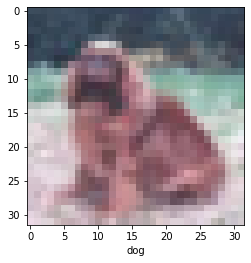

In [114]:
# plot of above predicted image of test datasets

plt.imshow(np.squeeze(X_test[101]))
plt.xlabel(classes[prediction])